# **#TechSeriesML Challenge**


*TechSeriesML : From Data, By Data, For Data*

<hr>

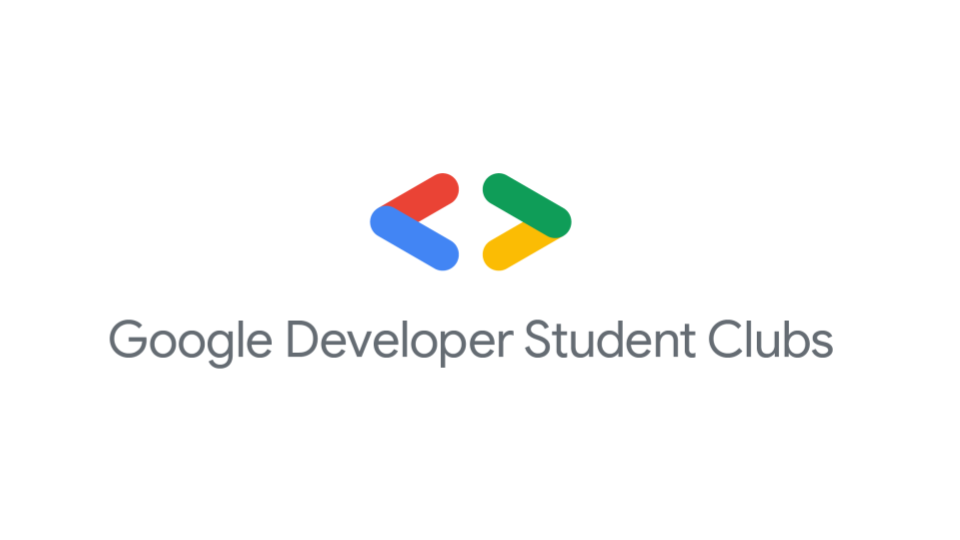

**Challenge Description**

Welcome to the #TechSeriesML challenge! In this challenge, participants will dive into the dataset containing information about various diamonds, exploring their characteristics, and predicting their prices.


**Challenge Tasks :**

1. Provide insights through Exploratory Data Analysis.
2. Build Machine Learning model to predict diamond prices.

## **Dataset**

https://raw.githubusercontent.com/damahindra/TechSeriesMLHOP/main/Challenge!/DiamondsDataset.csv

**Dataset Description**

This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

**Content**

> ***Price*** : price in US dollars (\$326--\$18,823)

> ***Carat*** : weight of the diamond (0.2--5.01)

> ***Cut*** : quality of the cut (Fair, Good, Very Good, Premium, Ideal)

> ***Color*** : diamond colour, from J (worst) to D (best)

> ***Clarity*** : a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

> ***X*** : length in mm (0--10.74)

> ***Y*** : width in mm (0--58.9)

> ***Z*** : depth in mm (0--31.8)

> ***Depth*** : total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

> ***Table*** : width of top of diamond relative to widest point (43--95)

## **Evaluation Criteria**

The evaluation criteria for this challenge includes :
- Data Preprocessing : 30%
- Data Visualization and Storytelling : 40%
- Modelling : 30%

## **Solution**

Provide your solution on cells below

## Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings("ignore")

## Data Overview

In [74]:
data = pd.read_csv('https://raw.githubusercontent.com/damahindra/TechSeriesMLHOP/main/Challenge!/DiamondsDataset.csv', index_col='Unnamed: 0')
data

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
# check data duplicates and nulls
print(f'Data Nulls :\n\n{data.isnull().sum()}\n')
print(f'Data Duplicates : {data.duplicated().sum()}') # There are 146 duplicates

Data Nulls :

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

Data Duplicates : 146


In [ ]:
# check data info
data.info() # price is in int64, changeable to float

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [ ]:
# check data description
print(f'Numerical Description : \n\n{data.describe()}') # numerical description, there are potential outliers in price, y, z
print(f'\nCategorical Description : \n\n{data.describe(include="object")}')

Numerical Description : 

              carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%       

## Data Visualizations

Text(0.5, 1.0, 'Diamond Clarities')

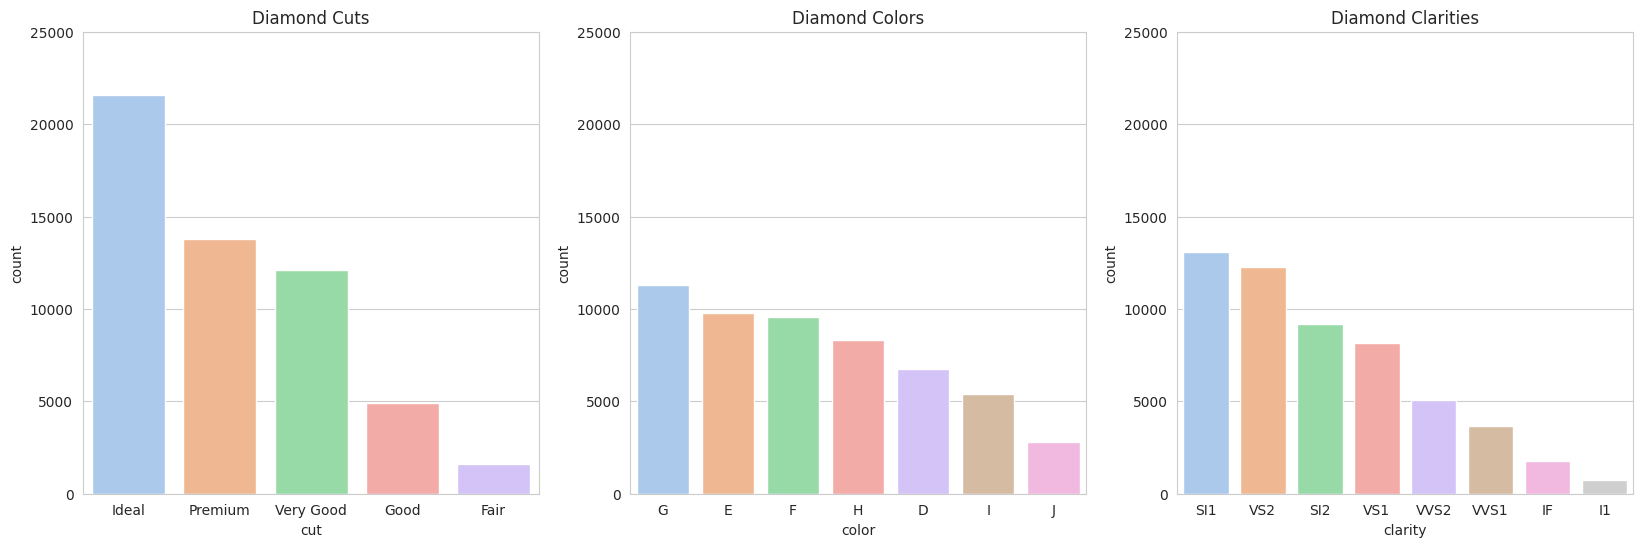

In [ ]:
# Categorical Univariate Analysis

plt.figure(figsize=(20,6))
min_value = 0
max_value = 25000

# Cuts
plt.subplot(1,3,1)
sns.countplot(data=data, x='cut', order=data['cut'].value_counts().index, palette='pastel')
plt.ylim(min_value,max_value)
plt.title('Diamond Cuts')

# Colors
plt.subplot(1,3,2)
sns.countplot(data=data, x='color', order=data['color'].value_counts().index, palette='pastel')
plt.ylim(min_value,max_value)
plt.title('Diamond Colors')

# Clarities
plt.subplot(1,3,3)
sns.countplot(data=data, x='clarity', order=data['clarity'].value_counts().index, palette='pastel')
plt.ylim(min_value,max_value)
plt.title('Diamond Clarities')

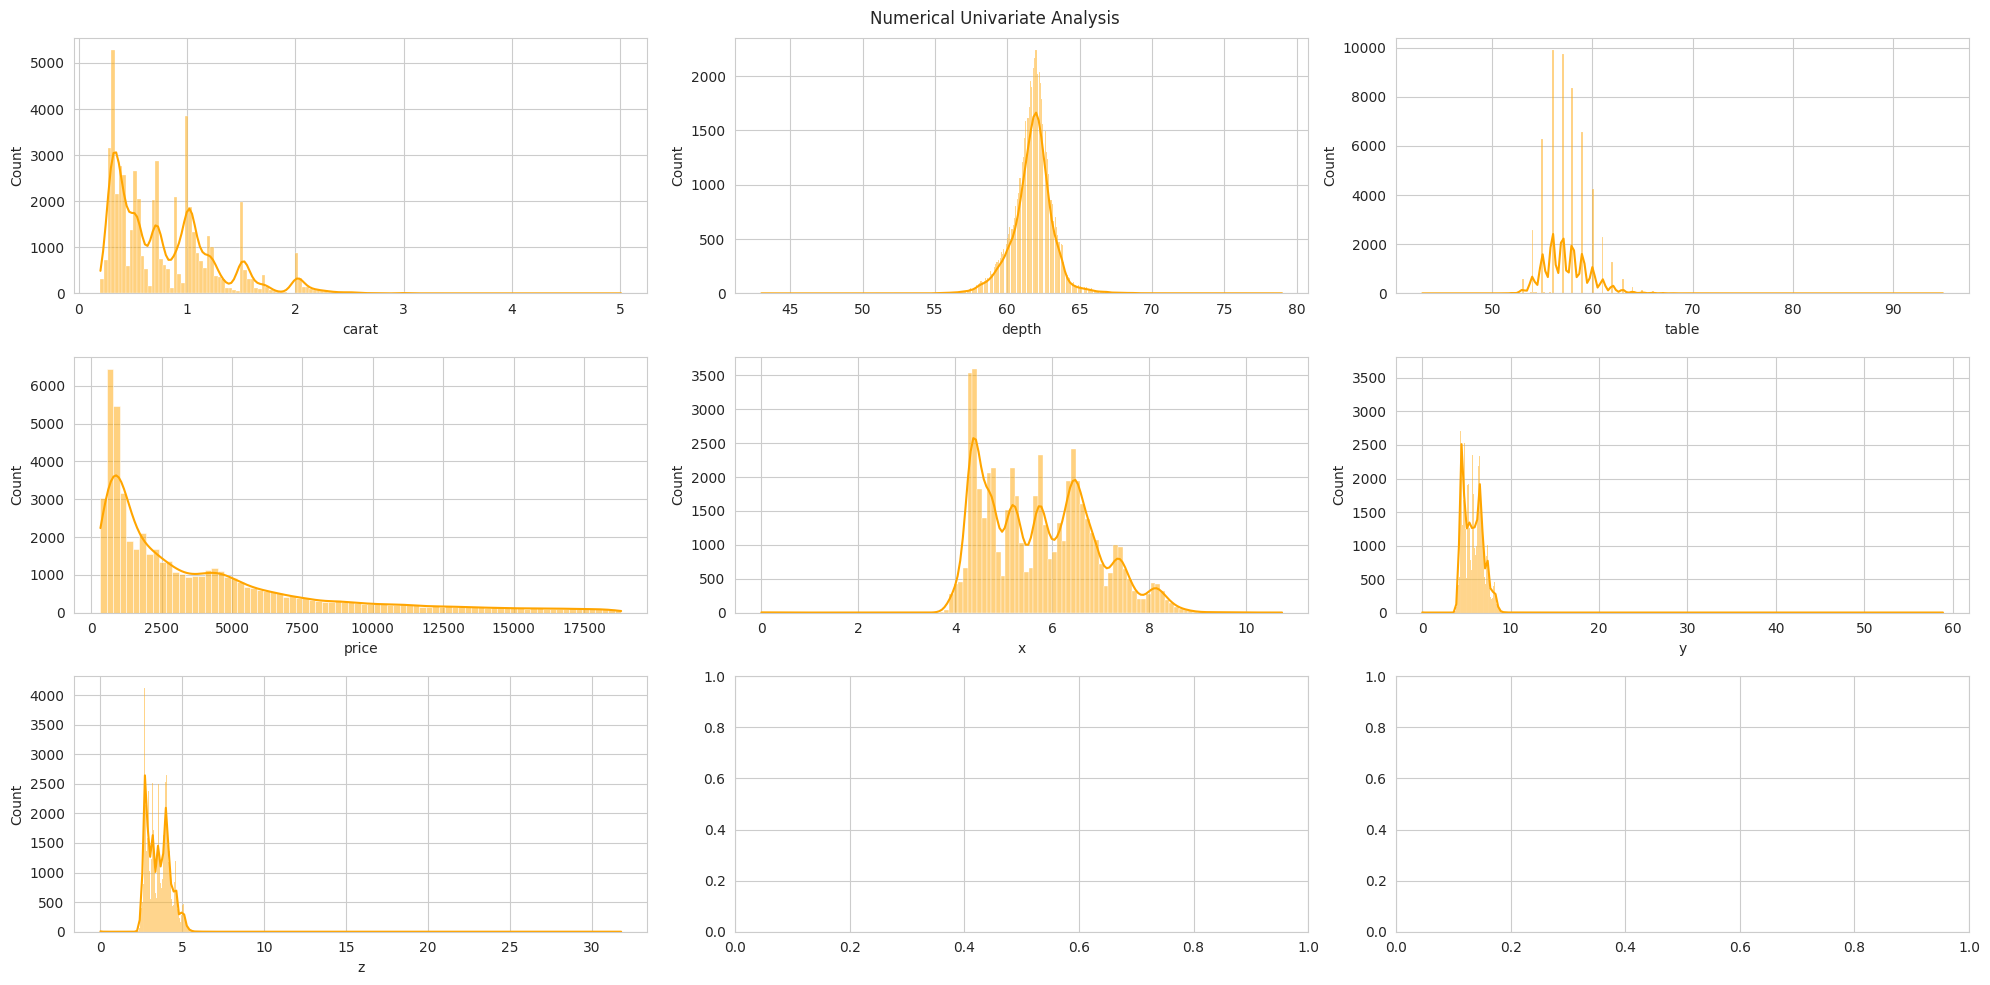

In [ ]:
# Numerical Univariate Analysis
# distribution analysis

row, column = 3,3

num_cols = list(data.select_dtypes('number'))
num_subplots = len(num_cols)

# Create a figure and axis array using plt.subplots
fig, axs = plt.subplots(row, column, figsize=(20, 10))
plt.suptitle('Numerical Univariate Analysis')

# Flatten the axs array to simplify indexing in the loop
axs = axs.flatten()

# Loop to create subplots
for i in range(num_subplots):
    # Plot data on each subplot
    sns.histplot(data=data[num_cols[i]], ax=axs[i], kde=True, color='orange')

# Adjust layout to prevent clipping of titles
plt.tight_layout()


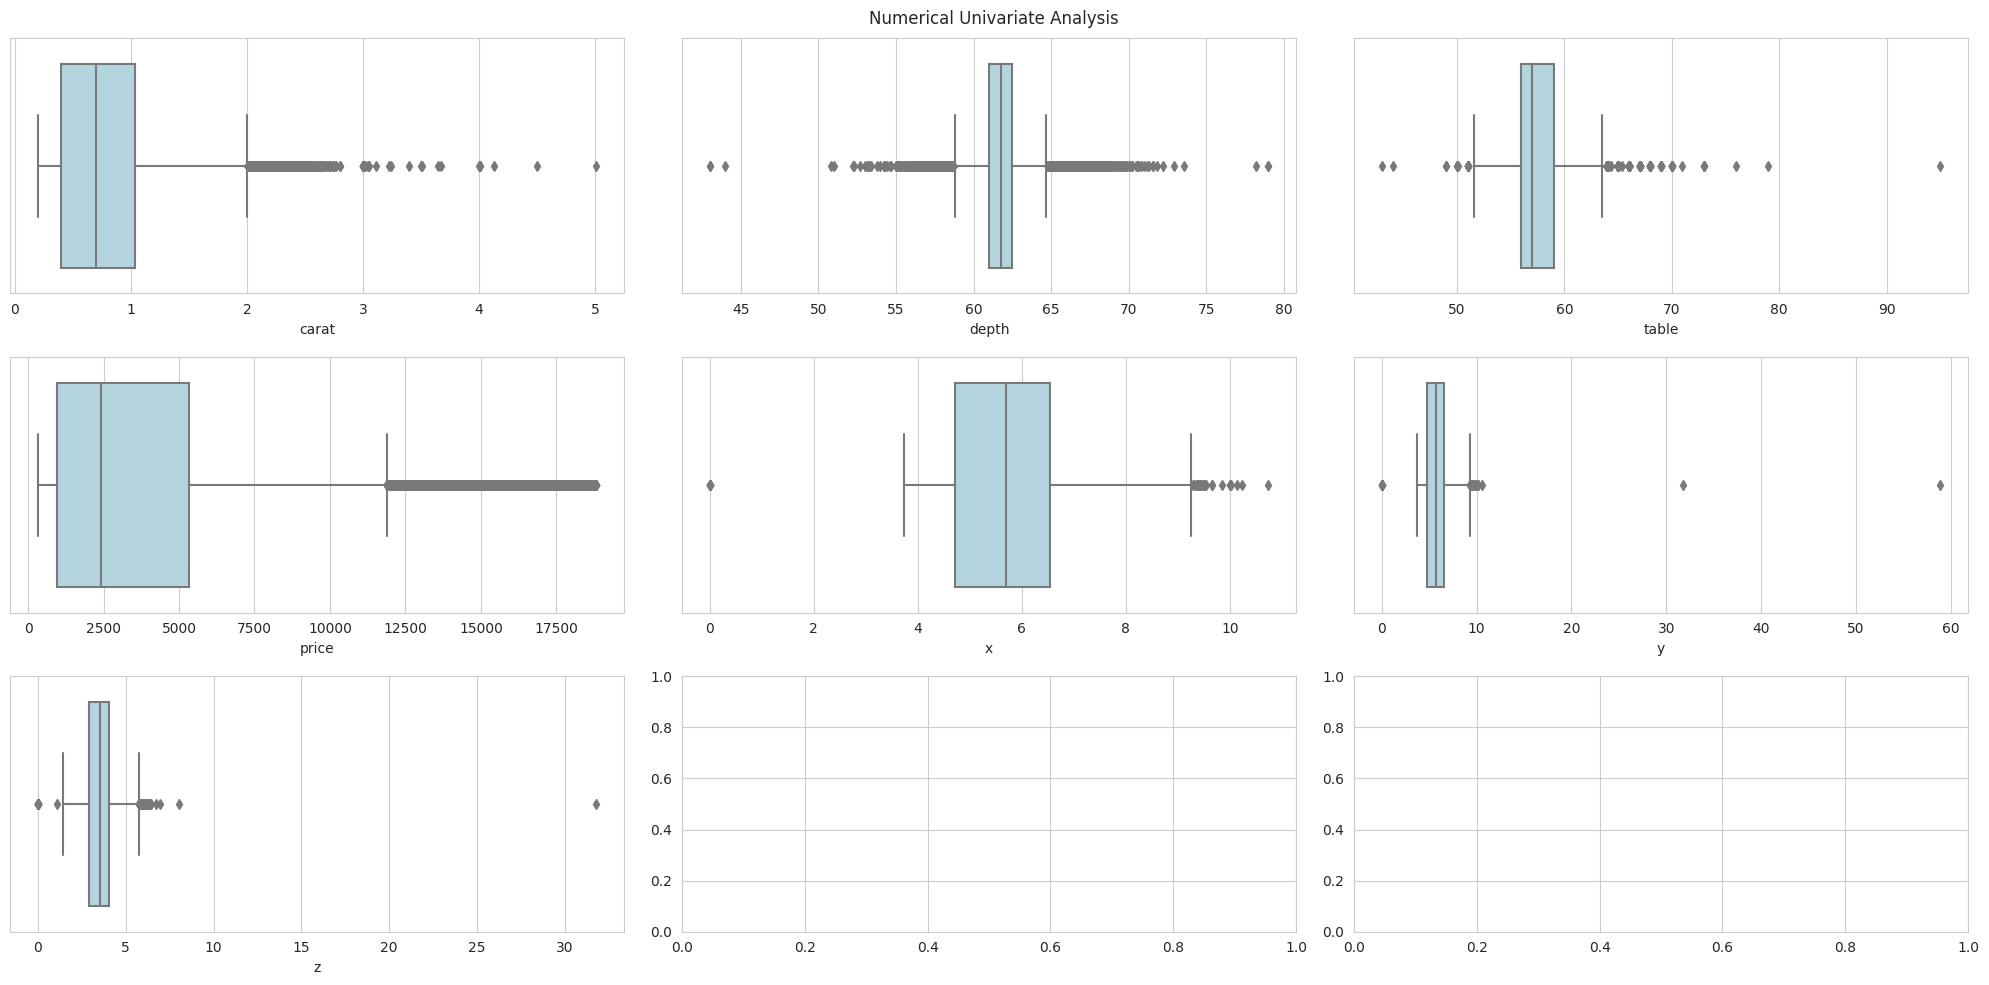

In [ ]:
# Numerical Univariate Analysis
# distribution analysis

row, column = 3,3

num_cols = list(data.select_dtypes('number'))
num_subplots = len(num_cols)

# Create a figure and axis array using plt.subplots
fig, axs = plt.subplots(row, column, figsize=(20,10))
plt.suptitle('Numerical Univariate Analysis')

# Flatten the axs array to simplify indexing in the loop
axs = axs.flatten()

# Loop to create subplots
for i in range(num_subplots):
    # Plot data on each subplot
    sns.boxplot(x=data[num_cols[i]], ax=axs[i], color='lightblue')

# Adjust layout to prevent clipping of titles
plt.tight_layout()


Text(0.5, 0.98, 'Pairplot Bivariate Analysis')

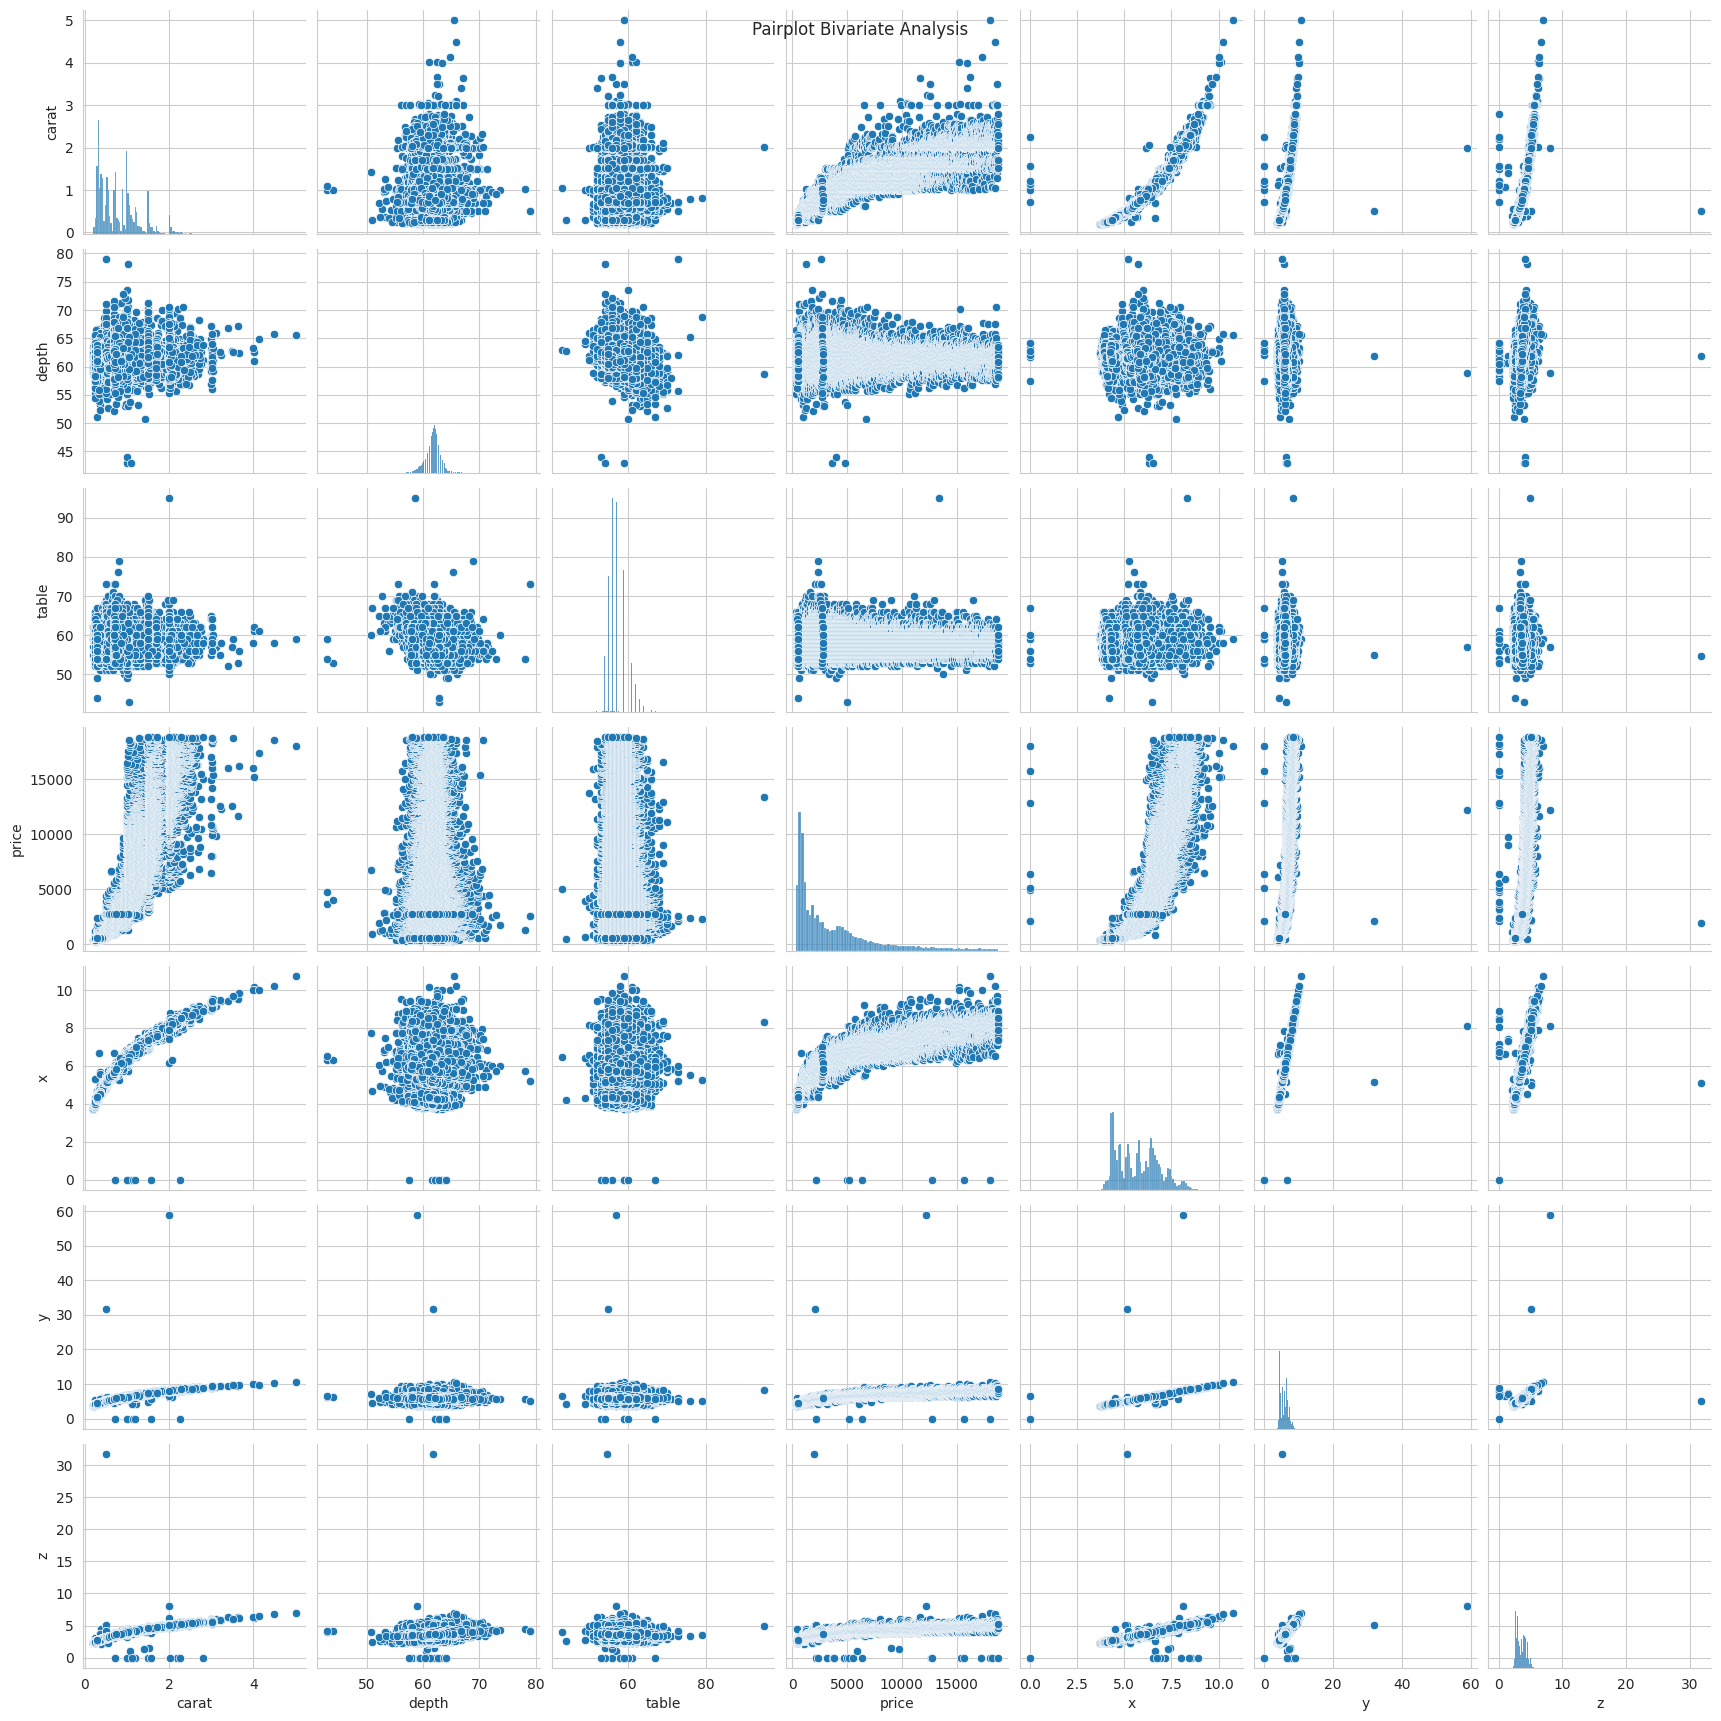

In [ ]:
# Bivariate Analysis with Pairplot

sns.pairplot(data=data)
plt.suptitle('Pairplot Bivariate Analysis')

Text(0.5, 1.0, 'Correlation Analysis')

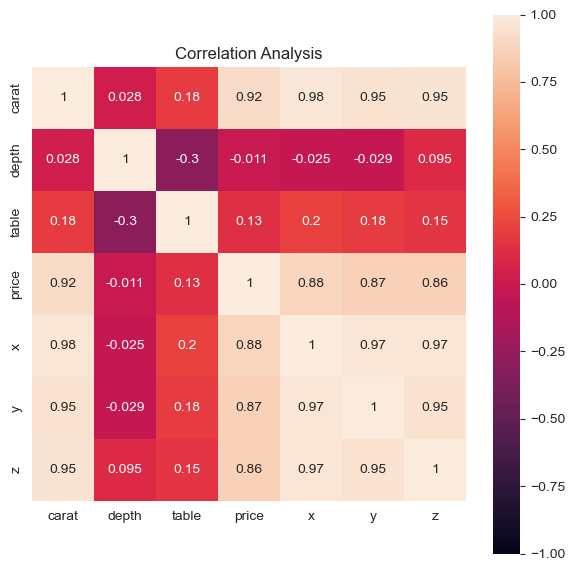

In [30]:
# Bivariate Correlation Analysis with Heatmap
data_corr = data.corr()
plt.figure(figsize=(7,7))
sns.heatmap(data=data_corr, square=True, vmin=-1, vmax=1, annot=True)
plt.title('Correlation Analysis')

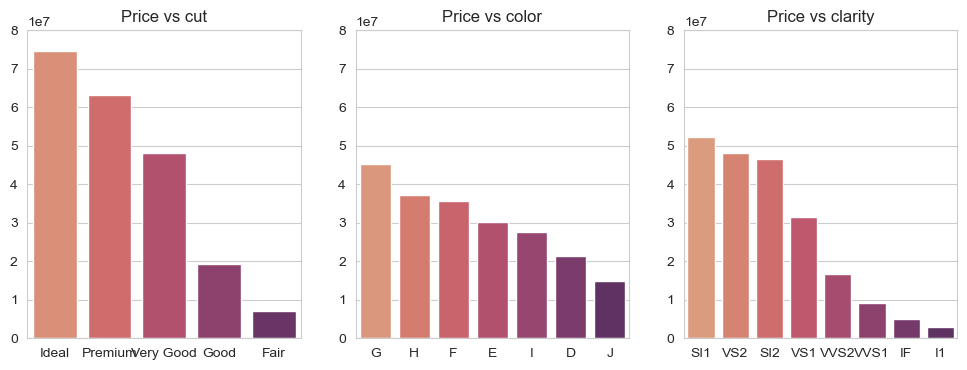

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [66]:
# Target Analysis on Categorical Features
cat_feats = list(data.select_dtypes('object'))
target = 'price'

row = 1
col = 3

fig, axs = plt.subplots(row, col, figsize=(12,4))

axs = axs.flatten()

def price_sum_cat(df, col, ax, target=target) :
    res = df.groupby(col)[target].sum().sort_values(ascending=False)
    index = list(res.index)
    val = list(res.values)
    plt.figure(figsize=(8,6))
    ax.set_title(f'Price vs {col}')
    sns.barplot(data=df, x=index, y=val, ax=ax, palette='flare')
    ax.set_ylim(0, 80000000)

for num, col in enumerate(cat_feats) :
    price_sum_cat(data, col, axs[num])

plt.tight_layout()
plt.show()

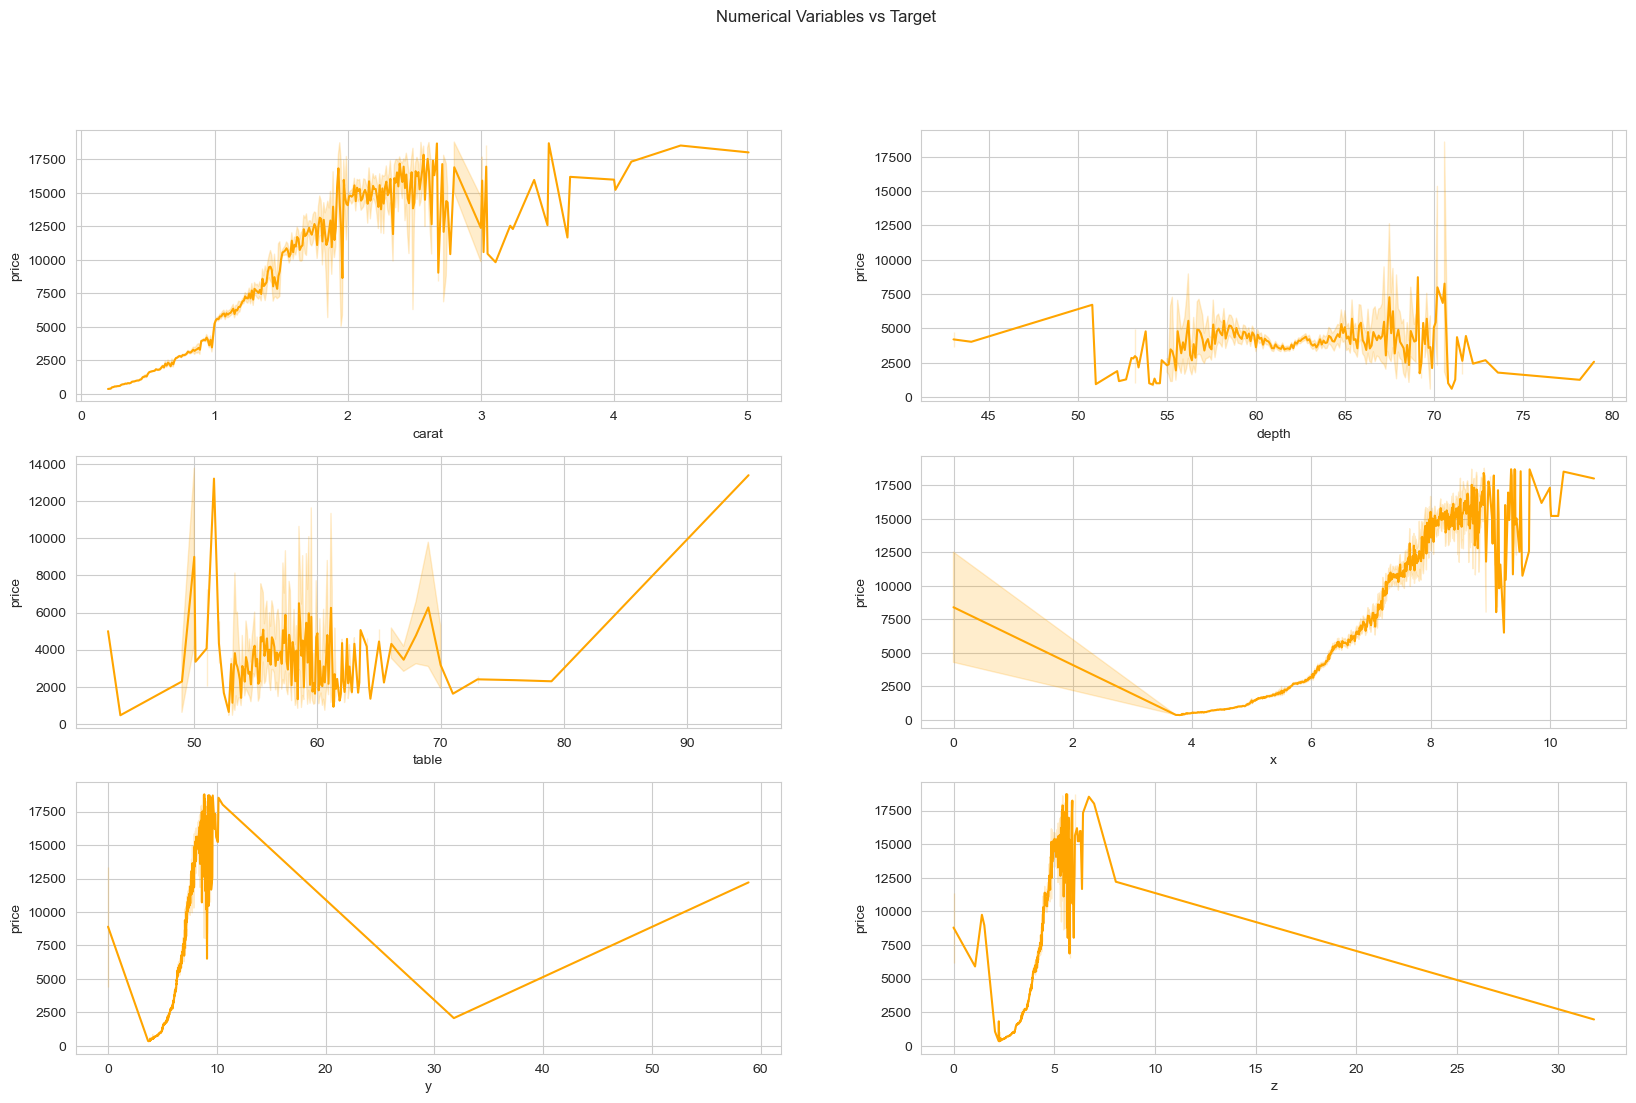

In [45]:
# Target Analysis on Numerical Features
num_feats = list(data.drop('price', axis=1).select_dtypes('number')) # exclude target
target = 'price'

row = 3
column = len(num_feats) // row

# Create a figure and axis array using plt.subplots
fig, axs = plt.subplots(row, column, figsize=(20,12))
plt.suptitle('Numerical Variables vs Target')

# Flatten the axs array to simplify indexing in the loop
axs = axs.flatten()

for num, feats in enumerate(num_feats) :
    sns.lineplot(data=data, x=feats, y=target, ax=axs[num], color='orange')

## Aggregations

In [27]:
# check prices based on categorical features
cat_feats = list(data.select_dtypes('object'))
target = 'price'

def check_price_sum(df, col, target=target) :
    res = df.groupby(col)[target].sum().sort_values(ascending=False)
    index = list(res.index)
    val = list(res.values)
    final = pd.DataFrame({
        'Category' : index,
        'Price Sum' : val
    })
    print(f'Feature : {col}\n\n{final}\n')

for feat in cat_feats :
    check_price_sum(data, feat)

Feature : cut

    Category  Price Sum
0      Ideal   74513487
1    Premium   63221498
2  Very Good   48107623
3       Good   19275009
4       Fair    7017600

Feature : color

  Category  Price Sum
0        G   45158240
1        H   37257301
2        F   35542866
3        E   30142944
4        I   27608146
5        D   21476439
6        J   14949281

Feature : clarity

  Category  Price Sum
0      SI1   52207755
1      VS2   48112520
2      SI2   46549485
3      VS1   31372190
4     VVS2   16635412
5     VVS1    9221984
6       IF    5128062
7       I1    2907809



## Outliers!

In [82]:
# detecting outliers using interquartile range

def detect_outliers(data, col):
    # Calculate the first and third quartiles (Q1 and Q3)
    Q1 = np.percentile(data[col], 25)
    Q3 = np.percentile(data[col], 75)

    # Calculate the IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = []
    all_val = data[col].values
    for val in all_val:
        if val > upper_bound or val < lower_bound :
            outliers.append(val)

    return len(outliers) / data.shape[0] * 100

# Usage
num_cols = data.select_dtypes('number')
for num, col in enumerate(num_cols) :
    outliers = detect_outliers(data, col)

    # Print the indices of outliers
    print(f"{num+1}. Number of outliers for {col} : {round(outliers, 2)}%")


1. Number of outliers for carat : 3.5%
2. Number of outliers for depth : 4.72%
3. Number of outliers for table : 1.12%
4. Number of outliers for price : 6.56%
5. Number of outliers for x : 0.06%
6. Number of outliers for y : 0.05%
7. Number of outliers for z : 0.09%


## Skewness

In [83]:
# check skewness
for col in data.select_dtypes('number') :
    print(f"{col} skew : {data[col].skew().round(2)}")

carat skew : 1.12
depth skew : -0.08
table skew : 0.8
price skew : 1.62
x skew : 0.38
y skew : 2.43
z skew : 1.52
